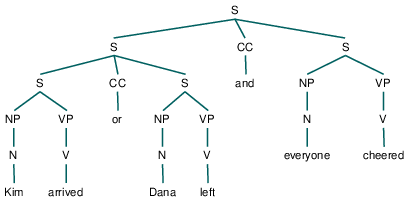

In [1]:
# Exercise: 8-3
# Consider the sentence Kim arrived or Dana left and everyone cheered. Write down the parenthesized forms to show
# the relative scope of and and or. Generate tree structures corresponding to both of these interpretations.

import nltk
from nltk import Tree

string = "(S (S (S (NP (N Kim)) (VP (V arrived))) (CC or) (S (NP (N Dana)) (VP (V left)))) (CC and) (S (NP (N everyone)) (VP (V cheered))))"
nltk.Tree.fromstring(string)

In [2]:
# Exercise: 8-4
# The Tree class implements a variety of other useful methods. See the Tree help documentation for more details
# (i.e., import the Tree class and then type help(Tree)).

from nltk import Tree

help(Tree)

Help on class Tree in module nltk.tree:

class Tree(builtins.list)
 |  Tree(node, children=None)
 |  
 |  A Tree represents a hierarchical grouping of leaves and subtrees.
 |  For example, each constituent in a syntax tree is represented by a single Tree.
 |  
 |  A tree's children are encoded as a list of leaves and subtrees,
 |  where a leaf is a basic (non-tree) value; and a subtree is a
 |  nested Tree.
 |  
 |      >>> from nltk.tree import Tree
 |      >>> print(Tree(1, [2, Tree(3, [4]), 5]))
 |      (1 2 (3 4) 5)
 |      >>> vp = Tree('VP', [Tree('V', ['saw']),
 |      ...                  Tree('NP', ['him'])])
 |      >>> s = Tree('S', [Tree('NP', ['I']), vp])
 |      >>> print(s)
 |      (S (NP I) (VP (V saw) (NP him)))
 |      >>> print(s[1])
 |      (VP (V saw) (NP him))
 |      >>> print(s[1,1])
 |      (NP him)
 |      >>> t = Tree.fromstring("(S (NP I) (VP (V saw) (NP him)))")
 |      >>> s == t
 |      True
 |      >>> t[1][1].set_label('X')
 |      >>> t[1][1].label()
 

In [3]:
# Exercise: 8-5
# In this exercise you will manually construct some parse trees.
# a: Write code to produce two trees, one for each reading of the phrase old men and women.

grammar = nltk.CFG.fromstring("""

S -> NP CC NP | JJ NP
NP -> N | JJ N | N CC N
N -> 'men' | 'women'
JJ -> 'old'
CC -> 'and'
""")

In [4]:
sent = ['old', 'men', 'and', 'women']
parser = nltk.ChartParser(grammar)
for tree in parser.parse(sent):
    print(tree)

(S (JJ old) (NP (N men) (CC and) (N women)))
(S (NP (JJ old) (N men)) (CC and) (NP (N women)))


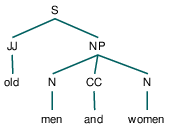

In [5]:
trees = []
for tree in parser.parse(sent):
    trees.append(str(tree))

nltk.Tree.fromstring(trees[0])

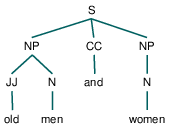

In [6]:
nltk.Tree.fromstring(trees[1])

In [7]:
for t in trees:
    nltk.Tree.fromstring(t)

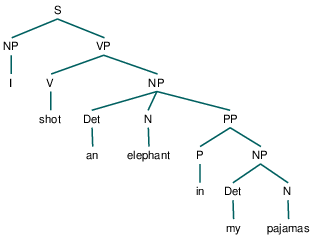

In [8]:
# b: Encode any of the trees presented in this chapter as a labeled bracketing, and use nltk.Tree() to check that
# it is well-formed. Now use draw() to display the tree.

groucho = "(S (NP I) (VP (V shot) (NP (Det an) (N elephant) (PP (P in)\
            (NP (Det my) (N pajamas))))))"
nltk.Tree.fromstring(groucho)

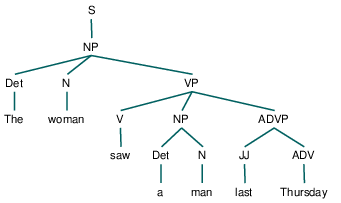

In [9]:
# c: As in (a), draw a tree for The woman saw a man last Thursday.

string = "(S (NP (Det The) (N woman) (VP (V saw) (NP (Det a) (N man))\
           (ADVP (JJ last) (ADV Thursday)))))"
nltk.Tree.fromstring(string)

In [10]:
# Exercise: 8-6
# Write a recursive function to traverse a tree and return the depth of the tree, such that a tree with a
# single node would have depth zero. (Hint: the depth of a subtree is the maximum depth of its children, plus one.)

def find_depth(tree):
    max_subtree_depth = 0
    for subtree in tree:
        if isinstance(subtree, nltk.Tree):
            max_subtree_depth = max(max_subtree_depth, find_depth(subtree))
        else:
            max_subtree_depth = max(max_subtree_depth, 0)

    return 1 + max_subtree_depth

from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
find_depth(t)

6

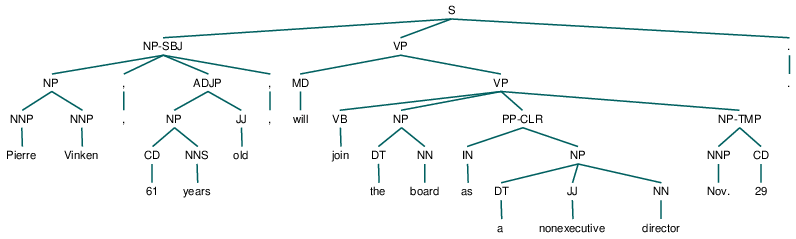

In [11]:
nltk.Tree.fromstring(str(t))

In [12]:
t = treebank.parsed_sents('wsj_0001.mrg')[1]
find_depth(t)

7

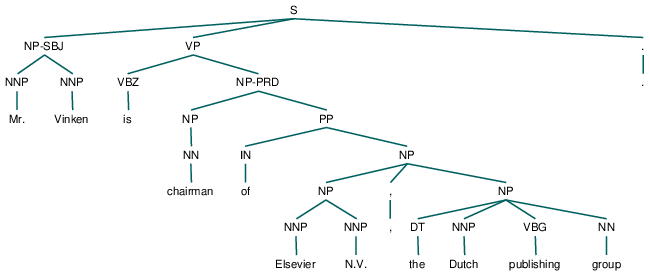

In [13]:
nltk.Tree.fromstring(str(t))

In [14]:
t = nltk.Tree.fromstring('(S (NP Alice) (VP chased (NP the rabbit)))')
find_depth(t)

3

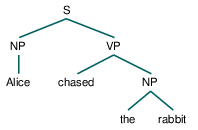

In [15]:
nltk.Tree.fromstring(str(t))

In [16]:
# Exercise: 8-9
# Can the grammar in grammar1 (Example 8-9) be used to describe sentences that are more than 20 words in length?

grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [17]:
sent = "a dog in the park by the cat with the telescope on the dog ate the man in the park by the cat with the telescope".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(sent):
    print(tree)

(S
  (NP
    (Det a)
    (N dog)
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP
          (P by)
          (NP
            (Det the)
            (N cat)
            (PP
              (P with)
              (NP
                (Det the)
                (N telescope)
                (PP (P on) (NP (Det the) (N dog))))))))))
  (VP
    (V ate)
    (NP
      (Det the)
      (N man)
      (PP
        (P in)
        (NP
          (Det the)
          (N park)
          (PP
            (P by)
            (NP
              (Det the)
              (N cat)
              (PP (P with) (NP (Det the) (N telescope))))))))))
(S
  (NP
    (Det a)
    (N dog)
    (PP
      (P in)
      (NP
        (Det the)
        (N park)
        (PP
          (P by)
          (NP
            (Det the)
            (N cat)
            (PP
              (P with)
              (NP
                (Det the)
                (N telescope)
                (PP (P on) (NP (Det the) (N dog))))))))))

In [18]:
len(sent)

26

In [19]:
# Exercise: 8-13
# Consider the sequence of words: Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo. This is a
# grammatically correct sentence, as explained at http://en.wikipedia.org/wiki/Buffalo_buffalo_Buffalo_buffalo_buffalo_buffalo_Buffalo_buffalo.
# Consider the tree diagram presented on this Wikipedia page, and write down a suitable grammar. Normalize case to
# lowercase, to simulate the problem that a listener has when hearing this sentence. Can you find other parses for
# this sentence? How does the number of parse trees grow as the sentence gets longer? (More examples of these sentences
# can be found at http://en.wikipedia.org/wiki/List_of_homophonous_phrases.)

grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> NP RC | PN N
  RC -> NP V
  VP -> V NP
  V -> "buffalo"
  N -> "buffalo"
  PN -> "Buffalo"
  """)

sent = "Buffalo buffalo Buffalo buffalo buffalo buffalo Buffalo buffalo".split()
cp_parser = nltk.ChartParser(grammar1)
for tree in cp_parser.parse(sent):
    print(tree)

(S
  (NP
    (NP (PN Buffalo) (N buffalo))
    (RC (NP (PN Buffalo) (N buffalo)) (V buffalo)))
  (VP (V buffalo) (NP (PN Buffalo) (N buffalo))))


In [20]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> NP RC | PN N
  RC -> NP V
  VP -> V NP
  V -> "buffalo"
  N -> "buffalo"
  PN -> "buffalo"
  """)

sent = ["buffalo"] * 8
cp_parser = nltk.ChartParser(grammar1)

for tree in cp_parser.parse(sent):
    print(tree)

(S
  (NP
    (NP (PN buffalo) (N buffalo))
    (RC (NP (PN buffalo) (N buffalo)) (V buffalo)))
  (VP (V buffalo) (NP (PN buffalo) (N buffalo))))
(S
  (NP (PN buffalo) (N buffalo))
  (VP
    (V buffalo)
    (NP
      (NP (PN buffalo) (N buffalo))
      (RC (NP (PN buffalo) (N buffalo)) (V buffalo)))))


In [21]:
[sum([1 for tree in cp_parser.parse(["buffalo"] * i)]) for i in range(8, 30, 3)]

[2, 5, 14, 42, 132, 429, 1430, 4862]

In [22]:
# Exercise: 8-15
# Extend the grammar in grammar2 with productions that expand prepositions as intransitive, transitive,
# and requiring a PP complement. Based on these productions, use the method of the preceding exercise to
# draw a tree for the sentence Lee ran away home.

grammar2 = nltk.CFG.fromstring("""
  S  -> NP VP
  NP -> PropN | Det N
  VP -> TV NP | V PP | IV
  PP -> P Comp
  PropN -> 'Lee'
  Det -> 'the' | 'a'
  N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
  TV -> 'ate'
  IV -> 'smiled'
  V ->  'ran'
  P -> 'away'
  Comp -> 'home'
  """)

In [23]:
rd_parser = nltk.RecursiveDescentParser(grammar2)
sent = 'Lee ran away home'.split()
for tree in rd_parser.parse(sent):
    print(tree)

(S (NP (PropN Lee)) (VP (V ran) (PP (P away) (Comp home))))


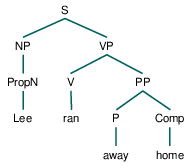

In [24]:
trees = []
for tree in rd_parser.parse(sent):
    trees.append(str(tree))

nltk.Tree.fromstring(trees[0])

In [25]:
# Exercise: 8-16
# Pick some common verbs and complete the following tasks:
# a: Write a program to find those verbs in the PP Attachment Corpus nltk.corpus.ppattach. Find any cases where
# the same verb exhibits two different attachments, but where the first noun, or second noun, or preposition stays
# unchanged (as we saw in our discussion of syntactic ambiguity in What’s the Use of Syntax?).

verbs = ["come", "get", "give", "go", "look", "take"]

from collections import defaultdict
entries = nltk.corpus.ppattach.attachments('training')
table = defaultdict(lambda: defaultdict(set))
for entry in entries:
    if entry.verb in verbs:
        key = entry.verb
        # same noun1
        noun1 = entry.noun1 + '_1'
        table[key][noun1].add(entry.attachment)
        # same noun2
        noun2 = entry.noun2 + '_2'
        table[key][noun2].add(entry.attachment)
        # same preposition
        table[key][entry.prep].add(entry.attachment)

In [26]:
for v in verbs:
    for key in sorted(table[v]):
        if len(table[v][key]) > 1:
            print(v, key, sorted(table[v][key]))

get at ['N', 'V']
get business_2 ['N', 'V']
get dollars_2 ['N', 'V']
get feeling_1 ['N', 'V']
get for ['N', 'V']
get from ['N', 'V']
get in ['N', 'V']
get license_1 ['N', 'V']
get number_1 ['N', 'V']
get on ['N', 'V']
get pound_1 ['N', 'V']
get price_1 ['N', 'V']
get sort_1 ['N', 'V']
get to ['N', 'V']
get without ['N', 'V']
give about ['N', 'V']
give answers_1 ['N', 'V']
give assessment_1 ['N', 'V']
give boost_1 ['N', 'V']
give firms_2 ['N', 'V']
give for ['N', 'V']
give in ['N', 'V']
give leaders_1 ['N', 'V']
give lot_1 ['N', 'V']
give offer_2 ['N', 'V']
give part_1 ['N', 'V']
give protection_1 ['N', 'V']
give sets_1 ['N', 'V']
give some_1 ['N', 'V']
give stake_1 ['N', 'V']
give time_2 ['N', 'V']
give to ['N', 'V']
go hand_1 ['N', 'V']
go in ['N', 'V']
go to ['N', 'V']
go way_1 ['N', 'V']
take action_1 ['N', 'V']
take against ['N', 'V']
take applications_1 ['N', 'V']
take at ['N', 'V']
take charge_1 ['N', 'V']
take charges_1 ['N', 'V']
take control_1 ['N', 'V']
take days_2 ['N', 'V']

In [27]:
for entry in entries:
    if entry.verb == 'get' and entry.prep == 'on':
        print(entry)

PPAttachment(sent='1445', verb='get', noun1='return', prep='on', noun2='investment', attachment='N')
PPAttachment(sent='5072', verb='get', noun1='hands', prep='on', noun2='some', attachment='V')
PPAttachment(sent='6424', verb='get', noun1='attention', prep='on', noun2='anything', attachment='N')
PPAttachment(sent='9020', verb='get', noun1='ideas', prep='on', noun2='issue', attachment='N')
PPAttachment(sent='13366', verb='get', noun1='contracts', prep='on', noun2='basis', attachment='V')
PPAttachment(sent='14798', verb='get', noun1='it', prep='on', noun2='line', attachment='V')
PPAttachment(sent='15597', verb='get', noun1='broker', prep='on', noun2='phone', attachment='V')
PPAttachment(sent='19796', verb='get', noun1='yields', prep='on', noun2='funds', attachment='N')
PPAttachment(sent='21750', verb='get', noun1='lock', prep='on', noun2='games', attachment='N')
PPAttachment(sent='30488', verb='get', noun1='vote', prep='on', noun2='day', attachment='V')
PPAttachment(sent='34668', verb='g

In [28]:
# b: Devise CFG grammar productions to cover some of these cases.

grammar3 = nltk.CFG.fromstring("""
  S  -> NP VP
  NP -> PRP | N PP | N | Det N
  VP -> MD VP | V NP | V NP PP
  PRP -> 'I'
  Det -> 'the'
  N -> 'hands' | 'some' | 'ideas' | 'issue'
  PP -> P NP
  MD -> M Inf
  M -> 'want'
  Inf -> 'to'
  V -> 'get'
  P -> 'on'
  """)

In [29]:
rd_parser = nltk.RecursiveDescentParser(grammar3)
sent = 'I want to get hands on some'.split()
for tree in rd_parser.parse(sent):
    print(tree)

(S
  (NP (PRP I))
  (VP
    (MD (M want) (Inf to))
    (VP (V get) (NP (N hands) (PP (P on) (NP (N some)))))))
(S
  (NP (PRP I))
  (VP
    (MD (M want) (Inf to))
    (VP (V get) (NP (N hands)) (PP (P on) (NP (N some))))))


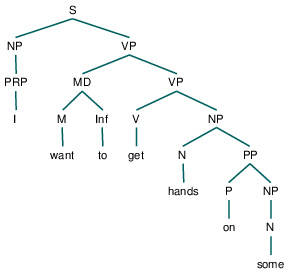

In [30]:
trees = []
for tree in rd_parser.parse(sent):
    trees.append(str(tree))

nltk.Tree.fromstring(trees[0])

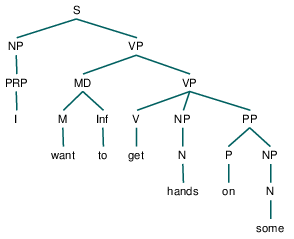

In [31]:
nltk.Tree.fromstring(trees[1])

In [32]:
rd_parser = nltk.RecursiveDescentParser(grammar3)
sent = 'I want to get ideas on the issue'.split()
for tree in rd_parser.parse(sent):
    print(tree)

(S
  (NP (PRP I))
  (VP
    (MD (M want) (Inf to))
    (VP (V get) (NP (N ideas) (PP (P on) (NP (Det the) (N issue)))))))
(S
  (NP (PRP I))
  (VP
    (MD (M want) (Inf to))
    (VP (V get) (NP (N ideas)) (PP (P on) (NP (Det the) (N issue))))))


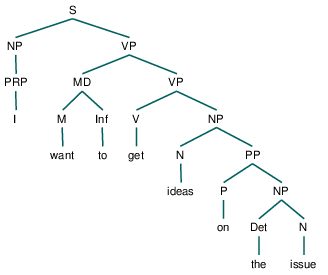

In [33]:
trees = []
for tree in rd_parser.parse(sent):
    trees.append(str(tree))

nltk.Tree.fromstring(trees[0])

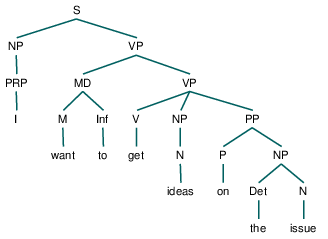

In [34]:
nltk.Tree.fromstring(trees[1])

In [35]:
# Exercise: 8-17
# Write a program to compare the efficiency of a top-down chart parser compared with a recursive descent parser
# (Parsing with Context-Free Grammar). Use the same grammar and input sentences for both. Compare their performance
# using the timeit module (see Algorithm Design for an example of how to do this).

groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

In [36]:
%%timeit

sent = 'I shot an elephant in my pajamas'.split()
parser = nltk.ChartParser(groucho_grammar)
parser.parse(sent)

419 µs ± 6.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [37]:
%%timeit

sent = 'I shot an elephant in my pajamas'.split()
rd_parser = nltk.RecursiveDescentParser(groucho_grammar)
rd_parser.parse(sent)

2.25 µs ± 26.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

In [39]:
%%timeit

sent = "a dog in the park by the cat with the telescope on the dog ate the man in the park by the cat with the telescope".split()
rd_parser = nltk.RecursiveDescentParser(grammar1)
rd_parser.parse(sent)

4.27 µs ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [40]:
%%timeit

sent = "a dog in the park by the cat with the telescope on the dog ate the man in the park by the cat with the telescope".split()
parser = nltk.ChartParser(grammar1)
parser.parse(sent)

2.23 ms ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
# Exercise: 8-18
# Compare the performance of the top-down, bottom-up, and left-corner parsers using the same grammar and three
# grammatical test sentences. Use timeit to log the amount of time each parser takes on the same sentence.
# Write a function that runs all three parsers on all three sentences, and prints a 3-by-3 grid of times,
# as well as row and column totals. Discuss your findings.

grammar4 = nltk.CFG.fromstring("""
S -> NP VP
NP -> Det N | NP PP
VP -> VP PP | V NP PP | V NP
PP -> P NP
NP -> 'I'
Det -> 'the' | 'a'
N -> 'man'
V -> 'saw'
P -> 'in' | 'with'
N -> 'park' | 'dog' | 'statue'
Det -> 'my'
""")

In [42]:
import timeit, nltk

def time_parsers(sents, grammar):
    """
    Times the performances of three parsers over
    a list of sentences.
    """

    top_down = nltk.TopDownChartParser(grammar)
    bottom_up = nltk.BottomUpChartParser(grammar)
    left_corner = nltk.LeftCornerChartParser(grammar)

    parsers = [top_down, bottom_up, left_corner]

    t = []

    for sent in sents:
        for parser in parsers:
            start = timeit.default_timer()
            parser.parse(sent)
            end = timeit.default_timer()
            t.append(end - start)

    ch = ["", "Top Down", "Bottom Up", "Left Corner", "Row Totals"]
    print("{:12}{:12}{:12}{:13}{:12}".format(ch[0], ch[1], ch[2],
                                              ch[3], ch[4]))
    l = len(sents)
    for i in range(l):
        print("{:12}{:<12.8}{:<12.8}{:<13.8}{:<12.8}".format(
                                   "Sent " + str(i + 1),
                                    t[(3 * i) + 0],
                                    t[(3 * i) + 1],
                                    t[(3 * i) + 2],
                                    sum(t[(3 * i) + 0:(3 * i) + 3])))
    col1 = sum(t[i] for i in range(0, l * 3, 3))
    col2 = sum(t[i] for i in range(1, l * 3, 3))
    col3 = sum(t[i] for i in range(2, l * 3, 3))
    print("{:12}{:<12.8}{:<12.8}{:<13.8}".format("Col Totals",
                                        col1, col2, col3))

In [43]:
sent1 = "I saw a dog in the park with a statue".split()
sent2 = "a man with a statue in the park saw a dog".split()
sent3 = "a dog saw the man with a statue in the park".split()

sents = [sent1, sent2, sent3]

time_parsers(sents, grammar4)

            Top Down    Bottom Up   Left Corner  Row Totals  
Sent 1      0.001426235 0.001457494 0.000894588  0.003778317 
Sent 2      0.001242438 0.001231877 0.000647425  0.00312174  
Sent 3      0.001313681 0.001532236 0.001054819  0.003900736 
Col Totals  0.003982354 0.004221607 0.002596832  


In [44]:
sent1 = "I saw a dog in the park with a statue".split()
sent2 = "a man with a statue in the park saw a dog".split()

sents = [sent1, sent2]

time_parsers(sents, grammar4)

            Top Down    Bottom Up   Left Corner  Row Totals  
Sent 1      0.001459314 0.001585214 0.000896922  0.00394145  
Sent 2      0.001340673 0.001319994 0.000741069  0.003401736 
Col Totals  0.002799987 0.002905208 0.001637991  


In [45]:
sent1 = "I saw a dog in the park with a statue".split()
sent2 = "a man with a statue in the park saw a dog".split()
sent3 = "a dog saw the man with a statue in the park".split()
sent4 = "I saw a man with a dog with a statue".split()

sents = [sent1, sent2, sent3, sent4]

time_parsers(sents, grammar4)

            Top Down    Bottom Up   Left Corner  Row Totals  
Sent 1      0.001952824 0.002922539 0.001264286  0.006139649 
Sent 2      0.001876488 0.001739635 0.000995803  0.004611926 
Sent 3      0.001965438 0.002349797 0.001316888  0.005632123 
Sent 4      0.001897423 0.002003724 0.001225735  0.005126882 
Col Totals  0.007692173 0.009015695 0.004802712  


In [46]:
# Exercise: 8-20
# To compare multiple trees in a single window, we can use the draw_trees() method.
# Define some trees and try it out:
# >>> from nltk.draw.tree import draw_trees
# >>> draw_trees(tree1, tree2, tree3)

from nltk.draw.tree import draw_trees

sent1 = "(S (NP I) (VP (VP (V shot) (NP (Det an) (N elephant))) (PP (P in) (NP (Det my) (N pajamas)))))"

sent2 = "(S (NP I) (VP (V shot) (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))"

draw_trees(nltk.Tree.fromstring(sent1), nltk.Tree.fromstring(sent2))

In [47]:
# Exercise: 8-21
# Using tree positions, list the subjects of the first 100 sentences in the Penn treebank; to make the results
# easier to view, limit the extracted subjects to subtrees whose height is at most 2.

from nltk.corpus import treebank

sbj = [subtree for tree in treebank.parsed_sents()[:100]
         for subtree in tree if subtree.label() == 'NP-SBJ']

[n for s in sbj for n in s.subtrees(lambda n: n.height() == 2)]

[Tree('NNP', ['Pierre']),
 Tree('NNP', ['Vinken']),
 Tree(',', [',']),
 Tree('CD', ['61']),
 Tree('NNS', ['years']),
 Tree('JJ', ['old']),
 Tree(',', [',']),
 Tree('NNP', ['Mr.']),
 Tree('NNP', ['Vinken']),
 Tree('NNS', ['researchers']),
 Tree('NNS', ['researchers']),
 Tree('NNP', ['Lorillard']),
 Tree('NNP', ['Inc.']),
 Tree(',', [',']),
 Tree('DT', ['the']),
 Tree('NN', ['unit']),
 Tree('IN', ['of']),
 Tree('JJ', ['New']),
 Tree('JJ', ['York-based']),
 Tree('NNP', ['Loews']),
 Tree('NNP', ['Corp.']),
 Tree('WDT', ['that']),
 Tree('-NONE-', ['*T*-2']),
 Tree('VBZ', ['makes']),
 Tree('NNP', ['Kent']),
 Tree('NNS', ['cigarettes']),
 Tree(',', [',']),
 Tree('DT', ['the']),
 Tree('JJS', ['latest']),
 Tree('NNS', ['results']),
 Tree('DT', ['A']),
 Tree('NNP', ['Lorillard']),
 Tree('NN', ['spokewoman']),
 Tree('PRP', ['We']),
 Tree('EX', ['There']),
 Tree('DT', ['Neither']),
 Tree('NNP', ['Lorillard']),
 Tree('CC', ['nor']),
 Tree('DT', ['the']),
 Tree('NNS', ['researchers']),
 Tree('WP', [

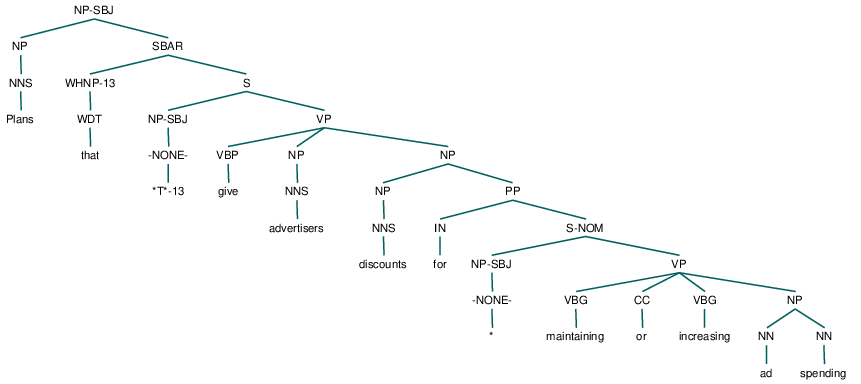

In [48]:
t = treebank.parsed_sents()[99]
t[0]

In [49]:
# Exercise: 8-24
# Write a recursive function that produces a nested bracketing for a tree, leaving out the leaf nodes and
# displaying the non-terminal labels after their subtrees. So the example in Grammar Development about
# Pierre Vinken would produce: [[[NNP NNP]NP , [ADJP [CD NNS]NP JJ]ADJP ,]NP-SBJ MD [VB [DT NN]NP [IN
# [DT JJ NN]NP]PP-CLR [NNP CD]NP-TMP]VP .]S. Consecutive categories should be separated by space.

import nltk

from nltk.corpus import treebank

In [50]:
def bracketing(tree, parents = []):

    parents.append(tree.label())

    l = len(tree) - 1
    for child in tree:
        if child.height() == 2:
            print(child.label(), end = "")
            if l > 0:
                print(" ", end = "")
                l -= 1
        elif isinstance(child, nltk.Tree):
            print("[", end = "")
            bracketing(child, parents)
    print("]" + parents.pop(), end = " ")

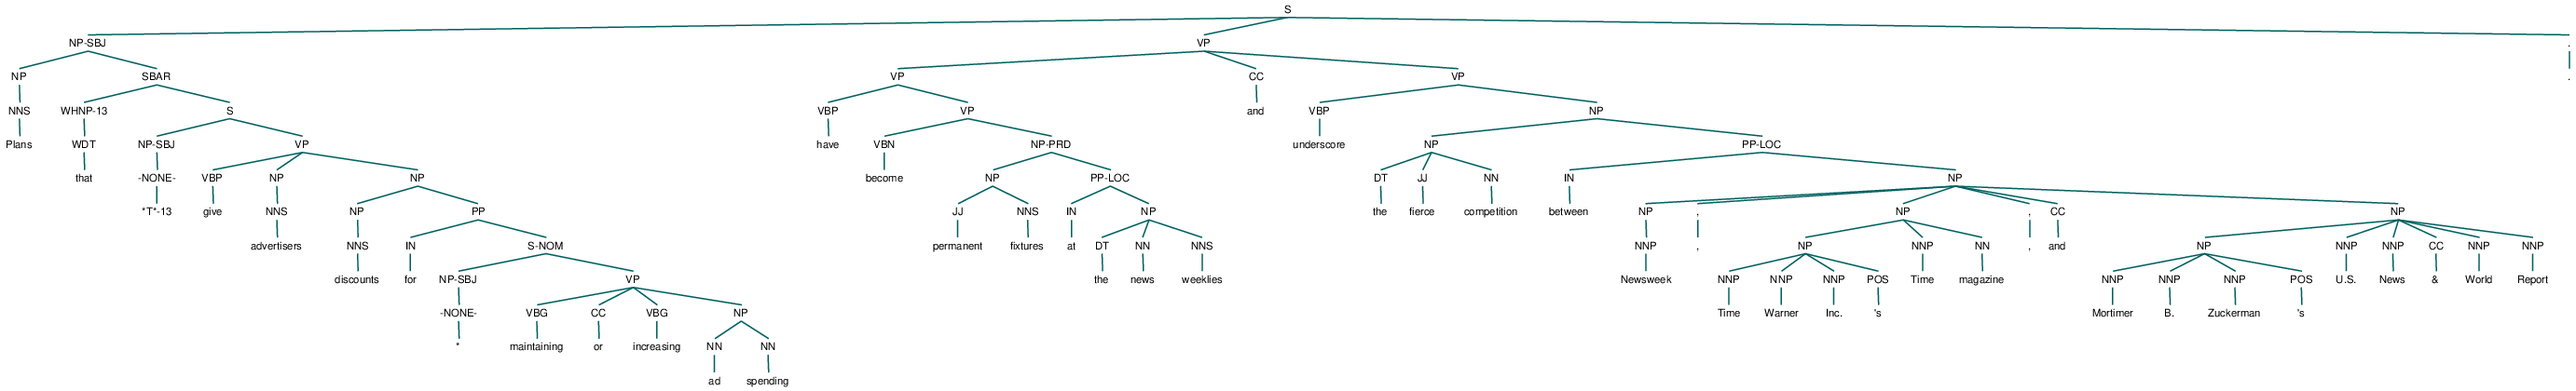

In [51]:
t

In [52]:
bracketing(t)

[[NNS]NP [[WDT]WHNP-13 [[-NONE-]NP-SBJ [VBP [NNS]NP [[NNS]NP [IN [[-NONE-]NP-SBJ [VBG CC VBG [NN NN]NP ]VP ]S-NOM ]PP ]NP ]VP ]S ]SBAR ]NP-SBJ [[VBP [VBN [[JJ NNS]NP [IN [DT NN NNS]NP ]PP-LOC ]NP-PRD ]VP ]VP CC [VBP [[DT JJ NN]NP [IN [[NNP]NP , [[NNP NNP NNP POS]NP NNP NN ]NP , CC [[NNP NNP NNP POS]NP NNP NNP CC NNP NNP ]NP ]NP ]PP-LOC ]NP ]VP ]VP . ]S 

In [53]:
# Exercise: 8-25
# Download several electronic books from Project Gutenberg. Write a program to scan these texts for any extremely
# long sentences. What is the longest sentence you can find? What syntactic construction(s) are responsible for
# such long sentences?

import os, re
path = "/home/af/Dokumenter/Programs/NaturalLanguageProcessingwithPython-py39/Chapter 8"
os.chdir(path)

opened_text = open('alice.txt', 'r', encoding = "utf8")
alice = []
for line in opened_text:
    alice.append(line)

alice = ' '.join(alice)

alice = re.sub('\n ', ' ', alice)
alice = re.sub('\ufeff   ', '', alice)

alice_sents = nltk.sent_tokenize(alice)

In [54]:
max_length = 0
longest_sentence = ""
for s in alice_sents:
    if len(s) > max_length:
        max_length = len(s)
        longest_sentence = s

In [55]:
longest_sentence

'[Illustration]  The chief difficulty Alice found at first was in managing her flamingo; she succeeded in getting its body tucked away, comfortably enough, under her arm, with its legs hanging down, but generally, just as she had got its neck nicely straightened out, and was going to give the hedgehog a blow with its head, it _would_ twist itself round and look up in her face, with such a puzzled expression that she could not help bursting out laughing: and when she had got its head down, and was going to begin again, it was very provoking to find that the hedgehog had unrolled itself and was in the act of crawling away: besides all this, there was generally a ridge or a furrow in the way wherever she wanted to send the hedgehog to, and, as the doubled-up soldiers were always getting up and walking off to other parts of the ground, Alice soon came to the conclusion that it was a very difficult game indeed.'

In [56]:
# Exercise: 8-26
# Modify the functions init_wfst() and complete_wfst() so that the contents of each cell in the WFST is a set
# of non-terminal symbols rather than a single non-terminal.

def init_wfst(tokens, grammar):
    numtokens = len(tokens)
    wfst = [[None for i in range(numtokens+1)] for j in range(numtokens+1)]
    for i in range(numtokens):
        productions = grammar.productions(rhs=tokens[i])
        wfst[i][i+1] = productions[0].lhs()
    return wfst

def complete_wfst(wfst, tokens, grammar, trace=False):
    index = dict((p.rhs(), p.lhs()) for p in grammar.productions())
    numtokens = len(tokens)
    for span in range(2, numtokens+1):
        for start in range(numtokens+1-span):
            end = start + span
            for mid in range(start+1, end):
                nt1, nt2 = wfst[start][mid], wfst[mid][end]
                if nt1 and nt2 and (nt1,nt2) in index:
                    wfst[start][end] = index[(nt1,nt2)]
                    if trace:
                        print("[%s] %3s [%s] %3s [%s] ==> [%s] %3s [%s]" % \
                        (start, nt1, mid, nt2, end, start, index[(nt1,nt2)], end))
    return wfst

def display(wfst, tokens):
    print('\nWFST ' + ' '.join(("%-4d" % i) for i in range(1, len(wfst))))
    for i in range(len(wfst)-1):
        print("%d   " % i, end=" ")
        for j in range(1, len(wfst)):
            print("%-4s" % (wfst[i][j] or '.'), end=" ")
        print()
tokens = "I shot an elephant in my pajamas".split()
wfst0 = init_wfst(tokens, groucho_grammar)
display(wfst0, tokens)


WFST 1    2    3    4    5    6    7   
0    NP   .    .    .    .    .    .    
1    .    V    .    .    .    .    .    
2    .    .    Det  .    .    .    .    
3    .    .    .    N    .    .    .    
4    .    .    .    .    P    .    .    
5    .    .    .    .    .    Det  .    
6    .    .    .    .    .    .    N    
